In [1]:
import numpy as np
import cvxpy as cvx
import pandas as pd
import logging
from functools import partial
import holoviews as hv
import sys
sys.path.append(r"..")
sys.path.append(r"../../HW9")
% load_ext autoreload
% autoreload 2
from HW9.hw9_script import *
hv.extension('bokeh')
import matplotlib.pylab as plt

UsageError: Line magic function `%` not found.


# Q1 - Gradient and Newton methods

### Gradient descent

In [43]:
n = 100
m = 200
np.random.seed(1)
logger = logging.getLogger("grad_descent")
A = np.random.randn(m,n)

STOP_PARAM = 10**-4
ALPHA = 0.01
BETA = 0.5

In [72]:
def obj(x, a):
    """
    x.shape = (n,1)
    """
    out = -np.log((1 - a.dot(x))).sum() - np.log((1 - x ** 2)).sum()
    # logger.info("obj:\t")
    return out


def grad(x, a):
    return a.T.dot(1 / (1 - a.dot(x))) + 2 * x / (1 - x ** 2)

def is_in_domain(x, a):
    if not (a.dot(x) <= 1).all() or not (np.abs(x)<=1).all():
        return False
    return True

def backtracking(obj_func, x, step_size, grad, is_valid_x_func
                 , alpha: float = 0.25, beta: float = 0.8):
    """
    x.shape = step_size.shape = grad.shape = (n,1)
    """
    t = 1
    while t > beta * t:
        if not is_valid_x_func(x + t * step_size):
            t *= beta
            continue
        elif obj_func(x + t * step_size) < obj_func(x) + alpha * t * grad.T.dot(step_size).squeeze():
            break
        t *= beta
    return t


def gradient_decent(obj_func, grad_func, in_domain_func, x0, logger, max_itr=10 ** 4):
    x_itr = x0
    fx = [obj_func(x0)]
    for k in range(max_itr):

        grad_itr = grad_func(x_itr)
        if np.linalg.norm(grad_itr) <= STOP_PARAM:
            logger.info(f"itr:{k}:early stopping!")
            break

        # get step size
        step_size_itr = -grad_itr

        # line search
        t_itr = backtracking(obj_func, x_itr, step_size_itr, grad_itr, in_domain_func, ALPHA, BETA)

        # GD update
        x_itr += t_itr * step_size_itr
        fx += [obj_func(x_itr)]

        logger.info(f"itr:{k}\tmean_step_size:{t_itr * step_size_itr.mean()}\tobj_value:{fx[-1]}")

    return x_itr, fx


In [74]:
# x = np.random.randn(n,1)
x0 = np.zeros((n,1))
obj_func = partial(obj, a=A)
grad_func = partial(grad, a=A)
in_domain_func = partial(is_in_domain, a=A)
logger = logging.getLogger("grad_descent")
x_prime, x_hist =\
        gradient_decent(obj_func, grad_func, in_domain_func, x0, logger=logger, max_itr=10 ** 4)

INFO:grad_descent:itr:0	mean_step_size:-0.0037515762004310766	obj_value:-41.81407476188681
INFO:grad_descent:itr:1	mean_step_size:-0.006318527500090893	obj_value:-73.09387663691727
INFO:grad_descent:itr:2	mean_step_size:-0.0040997351899688846	obj_value:-79.56455968369988
INFO:grad_descent:itr:3	mean_step_size:-0.0013135195514500239	obj_value:-89.85848765552798
INFO:grad_descent:itr:4	mean_step_size:-0.004509730879514931	obj_value:-101.48082537586293
INFO:grad_descent:itr:5	mean_step_size:-0.001385313587911086	obj_value:-102.53215431014087
INFO:grad_descent:itr:6	mean_step_size:-0.0014548732118284113	obj_value:-106.24958307470098
INFO:grad_descent:itr:7	mean_step_size:-0.0033300531279147998	obj_value:-116.07709296149969
INFO:grad_descent:itr:8	mean_step_size:-0.0014302528171651074	obj_value:-119.7232034273197
INFO:grad_descent:itr:9	mean_step_size:-0.0029704234527463086	obj_value:-123.61286401495617
INFO:grad_descent:itr:10	mean_step_size:-0.0016668656356302258	obj_value:-125.7311962495

INFO:grad_descent:itr:89	mean_step_size:9.152344185963762e-05	obj_value:-186.04230050558263
INFO:grad_descent:itr:90	mean_step_size:-0.00010804256159925028	obj_value:-186.04950819943065
INFO:grad_descent:itr:91	mean_step_size:4.25832115944485e-05	obj_value:-186.060028973735
INFO:grad_descent:itr:92	mean_step_size:-0.00014546871249554092	obj_value:-186.06757241365767
INFO:grad_descent:itr:93	mean_step_size:7.14177019577772e-05	obj_value:-186.08332044908664
INFO:grad_descent:itr:94	mean_step_size:-7.874175630771165e-05	obj_value:-186.08909278907706
INFO:grad_descent:itr:95	mean_step_size:7.111145351652885e-05	obj_value:-186.08972413902882
INFO:grad_descent:itr:96	mean_step_size:-9.735807343222022e-05	obj_value:-186.10162184346515
INFO:grad_descent:itr:97	mean_step_size:5.599937206841483e-05	obj_value:-186.10414584279332
INFO:grad_descent:itr:98	mean_step_size:-7.602895269688503e-05	obj_value:-186.11250866449598
INFO:grad_descent:itr:99	mean_step_size:4.247564563133175e-05	obj_value:-186.

INFO:grad_descent:itr:177	mean_step_size:8.155899392687103e-06	obj_value:-186.20550983196082
INFO:grad_descent:itr:178	mean_step_size:-1.5250117287173937e-06	obj_value:-186.20557588180816
INFO:grad_descent:itr:179	mean_step_size:1.1720951112030208e-05	obj_value:-186.20559834325005
INFO:grad_descent:itr:180	mean_step_size:-5.890053148194768e-06	obj_value:-186.20571019240393
INFO:grad_descent:itr:181	mean_step_size:8.922015770643475e-06	obj_value:-186.2057578952273
INFO:grad_descent:itr:182	mean_step_size:-3.4991764608335656e-06	obj_value:-186.2058270978655
INFO:grad_descent:itr:183	mean_step_size:1.3900225706740596e-05	obj_value:-186.20584963277418
INFO:grad_descent:itr:184	mean_step_size:-7.305746599766815e-06	obj_value:-186.2059815001236
INFO:grad_descent:itr:185	mean_step_size:9.71905837529077e-06	obj_value:-186.20600451481374
INFO:grad_descent:itr:186	mean_step_size:-4.505311195867878e-06	obj_value:-186.20607986026428
INFO:grad_descent:itr:187	mean_step_size:7.438846707508066e-06	ob

INFO:grad_descent:itr:352	mean_step_size:-7.866853732567587e-08	obj_value:-186.2071909020181
INFO:grad_descent:itr:353	mean_step_size:2.384632947807708e-07	obj_value:-186.2071909306772
INFO:grad_descent:itr:354	mean_step_size:-6.497617172524501e-08	obj_value:-186.2071909374518
INFO:grad_descent:itr:355	mean_step_size:2.301200212437479e-07	obj_value:-186.20719099268808
INFO:grad_descent:itr:356	mean_step_size:-4.760797552577097e-09	obj_value:-186.20719101358355
INFO:grad_descent:itr:357	mean_step_size:1.7161511307407026e-07	obj_value:-186.2071910465372
INFO:grad_descent:itr:358	mean_step_size:6.790240432085328e-08	obj_value:-186.20719105539064
INFO:grad_descent:itr:359	mean_step_size:2.4729657342711865e-07	obj_value:-186.2071911183273
INFO:grad_descent:itr:360	mean_step_size:-3.2164845257125656e-08	obj_value:-186.20719112958483
INFO:grad_descent:itr:361	mean_step_size:1.814189846623371e-07	obj_value:-186.20719116444255
INFO:grad_descent:itr:362	mean_step_size:1.2590070659437462e-08	obj_

INFO:grad_descent:itr:440	mean_step_size:-2.2239853078372348e-08	obj_value:-186.20719171572668
INFO:grad_descent:itr:441	mean_step_size:4.735000892278535e-08	obj_value:-186.20719171612998
INFO:grad_descent:itr:442	mean_step_size:-1.1405359259846268e-08	obj_value:-186.20719171722857
INFO:grad_descent:itr:443	mean_step_size:3.813992618878083e-08	obj_value:-186.20719171785873
INFO:grad_descent:itr:444	mean_step_size:-8.633746263413095e-09	obj_value:-186.20719171797273
INFO:grad_descent:itr:445	mean_step_size:3.611361028577141e-08	obj_value:-186.2071917192606
INFO:grad_descent:itr:446	mean_step_size:5.736742804778841e-10	obj_value:-186.20719171971334
INFO:grad_descent:itr:447	mean_step_size:2.7080977138541406e-08	obj_value:-186.20719172047507
INFO:grad_descent:itr:448	mean_step_size:1.2963082549785859e-08	obj_value:-186.20719172060615
INFO:grad_descent:itr:449	mean_step_size:3.871230470964813e-08	obj_value:-186.20719172208325
INFO:grad_descent:itr:450	mean_step_size:-3.80706330804209e-09	o

INFO:grad_descent:itr:528:early stopping!


In [75]:
to_show=pd.DataFrame(x_hist - x_hist[-1],columns=["f(x_itr)-f(x_prime)"])
hv.Curve(to_show).options(width=800,logy=True)

:Curve   [index]   (f(x_itr)-f(x_prime))

### Newton descent

In [76]:
logger = logging.getLogger("hess_descent")

In [77]:
def hess(x, a):
    return a.T.dot(np.diag(1/((1-a.dot(x))**2).squeeze())).dot(a) + np.diag((1/((1-x)**2) + 1/((1+x)**2)).squeeze())

def newton_decent(obj_func, grad_func, in_domain_func, hess_func, tol, x0, logger, max_itr=10 ** 4):
    x_itr = x0
    fx = [obj_func(x0)]
    for k in range(max_itr):

        grad_itr = grad_func(x_itr)
        hess_itr = hess_func(x_itr)

        # compute newton step and decrement
        step_size_itr = -np.linalg.inv(hess_itr).dot(grad_itr)
        newton_decrement = grad_itr.T.dot(-step_size_itr)

        if newton_decrement / 2 <= tol:
            logger.info(f"itr:{k}:early stopping!")
            break

        # line search
        t_itr = backtracking(obj_func, x_itr, step_size_itr, grad_itr, in_domain_func, ALPHA, BETA)

        # GD update
        x_itr += t_itr * step_size_itr
        fx += [obj_func(x_itr)]

        logger.info(f"itr:{k}\tmean_step_size:{t_itr * step_size_itr.mean()}\tobj_value:{fx[-1]}")

    return x_itr, fx

In [81]:
hess_func = partial(hess, a=A)
tol = 10**-6
x0 = np.zeros((n,1))
logger = logging.getLogger("NewtonDescent")
x_prime, x_hist =\
        newton_decent(obj_func, grad_func, in_domain_func, hess_func, tol, x0, logger=logger, max_itr=10 ** 4)

INFO:NewtonDescent:itr:0	mean_step_size:-0.016548716513128742	obj_value:-77.10672799105839
INFO:NewtonDescent:itr:1	mean_step_size:-0.027768224656827573	obj_value:-149.18955123328587
INFO:NewtonDescent:itr:2	mean_step_size:-0.020918872742010822	obj_value:-173.82437945034673
INFO:NewtonDescent:itr:3	mean_step_size:-0.02318278966406316	obj_value:-184.0054218888269
INFO:NewtonDescent:itr:4	mean_step_size:0.002657355988206228	obj_value:-185.492794146569
INFO:NewtonDescent:itr:5	mean_step_size:0.0009207794220105995	obj_value:-186.02799864488358
INFO:NewtonDescent:itr:6	mean_step_size:0.0006100945176335759	obj_value:-186.19038090692112
INFO:NewtonDescent:itr:7	mean_step_size:0.00026387058277400763	obj_value:-186.20700249371865
INFO:NewtonDescent:itr:8	mean_step_size:2.731534997547287e-05	obj_value:-186.20719170576498
INFO:NewtonDescent:itr:9:early stopping!


In [82]:
to_show=pd.DataFrame(x_hist - x_hist[-1],columns=["f(x_itr)-f(x_prime)"])
hv.Curve(to_show).options(width=800,logy=True)

:Curve   [index]   (f(x_itr)-f(x_prime))

# Q2 -  Efficient solution of basic portfolio optimization problem

see [this link](https://nbviewer.jupyter.org/github/cvxgrp/cvx_short_course/blob/master/applications/portfolio_optimization.ipynb) for more info

This problem concerns the simplest possible portfolio optimization problem: \begin{array}{ll}\mbox{maximize} \ \  \mu^T w - (\lambda/2) w^T \Sigma w\\\mbox{subject to} \ \    \mathbf{1}^T w = 1,\end{array}
  
with variable $\in \mathbf{R}^n$ (the normalized portfolio, with negative entries meaning short positions), and data $\mu$ (mean return), $\Sigma \in \mathbf{S}_{++}^n$ (return covariance), and $\lambda $ (the risk aversion parameter). 

The return covariance has the factor form $\Sigma = FQF^T + D$, where $F\in \mathbf{R}^{n \times k}$ (with rank $K$) is the  factor loading matrix, $Q \in \mathbf{S}_{++}^k$ is the factor covariance matrix, and $D$ is a diagonal matrix with positive entries, called the  idiosyncratic risk (since it describes the risk of each asset that is independent of the factors). This form for $\Sigma$ is referred to as a  ;#39;$k$-factor risk model ;#39;. Some typical dimensions are $n=2500$ (assets) and $k=30$

Some basic definitions

- **$\lambda$ risk aversion**-  the behavior of humans (especially consumers and investors), who, when exposed to uncertainty, attempt to lower that uncertainty

#### (a) 
What is the flop count for computing the optimal portfolio, if the low-rank plus diagonal structure of $\Sigma$ is not exploited? You can assume that $\lambda=1$ (which can be arranged by absorbing it into $\Sigma$).

**Solution** - This equality constrained problem can be solved with simple linear equation of the KKT matrix (see Equality constrained minimization 11-3).The KKT matrix is $\Sigma\in R^{n\times n}$ and $\mathbf{1}\in R^n$.
Thus we have square $(n+1)\times(n+1)$ matrix with $n\times n$ zero block.Accordig to solving with structured sub blocks (using Shur's comp.) we do 1 $\Sigma$ inversion which dominants the computation . The symmatric $\Sigma$ factorization is $(1/3)n^3$ (Cholesky)



#### (b)
Explain how to compute the optimal portfolio more efficiently, and give the flop
count for your method. You can assume that k ≪ n. You do not have to give the
best method; any method that has linear complexity in n is fine. You can assume
that λ = 1.


Hints. You may want to introduce a new variable $y = F^T w$ (which is called the
vector of factor exposures). You may want to work with the matrix

**Solution** - see solutions. In general do variable change with y and build KKT matrix for new problem (do not forget to differentiate by $w$ and by $y$). After that use the method of solving equations with sub block (9-12 in slides) to factor+solve A11 and to form $S$ ($S = A_{22} - A_{21}A_{11}^{-1}A_{21}$) and compute the flop count giving the diagonal structure of $D$ and special sparse structure of $A_{11}$

# Q3 - Sizing a gravity feed water supply network
A water supply network connects water supplies (such as reservoirs) to consumers via a network of pipes. Water flow in the network is due to gravity (as opposed to pumps, which could also be added to the formulation). The network is composed of a set of $n$ nodes and $m$ directed edges between pairs of nodes. The first $k$ nodes are supply or reservoir nodes, and the remaining $n-k$ are consumer nodes. The edges correspond to the pipes in the water supply network. 

 We let   $f_j \geq 0$ denote the water flow in pipe (edge) $j$ , and $h_i$ denote the (known) altitude or height of node $i$ (say, above sea level). At nodes $i=1, \ldots, k$ , we let $s_i \geq 0$ denote the flow into the network from the supply. For $i=1, \ldots, n-k$ , we let $c_i \geq 0$ denote the water flow taken out of the network (by consumers) at node $k+i$ . Conservation of flow can be expressed as 
 $A f = \left[ \begin{array}{c} -s \\ c \end{array}\right],$ 
 where $A \in \mathbf{R} ^{n \times m}$ is the incidence matrix for the supply network, given by 
 $A_{ij} = \left\{ \begin{array}{ll}-1   \mbox{if edge $j$ leaves node $i$ }\\+1   \mbox{if edge $j$ enters node $i$ }\\0   \mbox{otherwise}.\end{array}\right.$ 
 
 We assume that each edge is oriented from a node of higher altitude to a node of lower altitude; if edge $j$ goes from node $i$ to node $l$ , we have $h_i ;amp;gt; h_l$ . The pipe flows are determined by 
 $f_j = \frac{\alpha \theta_j R_j^2(h_i-h_l)}{L_j},$ 
 where edge $j$ goes from node $i$ to node $l$ , $\alpha$ is a known constant, $L_j$ is the (known) length of pipe $j$ , $R_j$ is the radius of pipe $j$ , and $\theta_j \in [0,1]$ corresponds to the valve opening in pipe $j$ . 

 Finally, we have a few more constraints. The supply feed rates are limited: we have $s_i \leq S^\mathrm{max}_i$ .  The pipe radii are limited: we have $R^\mathrm{min}_j \leq R_j \leq R^\mathrm{max}_j$ . (These limits are all known.) 

(a) Supportable consumption vectors. Suppose that the pipe radii are fixed and known.
 We say that $c \in \mathbf{R}^{n-k}_+$  is supportable if there is a choice of $f, s$ and $\theta$ for which all constraints and conditions above 
 are satisfied. Show that the set of supportable consumption vectors is a polyhedron, and explain how to determine whether or not a given consumption
 vector is supportable.

**Solution** - see pdf solution

(b) Optimal pipe sizing. You must select the pipe radii $R_j$ to minimize the cost, 
which we take to be (proportional to) the total volume of the pipes, $L_1 R_1^2 + \cdots + L_m R_m^2$,
subject to being able to support a set of consumption vectors, denoted $c^{(1)},
\ldots, c^{(N)}$, which we refer to as consumption scenarios. 
(This means that any consumption vector in the convex hull of $\{ c^{(1)}, \ldots,
c^{(N)} \}$ will be supportable.) Show how to formulate this as a convex optimization problem. 
Note. You are asked to choose one set of pipe radii, and $N$ sets of valve parameters, 
flow vectors, and source vectors; one for each consumption scenario

**Solution** - see pdf solution

(c) Solve the instance of the optimal pipe sizing problem with data defined in the file 
`grav_feed_network_data.m`
, and report the optimal value and the optimal pipe radii. The columns of the matrix $C$ in 
the data file are the consumption vectors $c^{(1)}, \ldots, c^{(N)}$./p;gt;

Hint. $-A^Th$ gives a vector containing the height differences across the edges./p;gt;


In [49]:
from HW9.hw9_script import syntesize_waterflow_data
alpha, Rmin, Rmax, Smax, C, L, h, A \
    ,num_nodes, num_edge, num_producers, num_scenarios = syntesize_waterflow_data()

In [53]:
z = cvx.Variable(shape = (num_edge,1), nonneg=True)
s = cvx.Variable(shape = (num_producers,num_scenarios),nonneg=True)
f = cvx.Variable(shape = (num_edge,num_scenarios),nonneg=True)
D1 = alpha * np.diag(-A.T.dot(h).flatten()) * np.diag(1/L.flatten())   

obj_func = cvx.Minimize(L.T * z)

constraints = [
    z >= Rmin**2,
    z <= Rmax**2,
]

loop_const = []
for k in range(num_scenarios):
    loop_const += [f[:,k] <= (D1*z).flatten()]
    loop_const += [A * f[:,k] == cvx.hstack([-s[:,k], C[:,k]])]
    loop_const += [s[:,k] <= Smax.flatten()]
constraints += loop_const 
prob = cvx.Problem(obj_func ,constraints)
sol = prob.solve(cvx.SCS)
print(f"optimal solution is: \t{sol}")
print(f"the optimal radii are\n{np.sqrt(z.value)}")


optimal solution is: 	325.7324913202739
the optimal radii are
[[0.49995483]
 [0.49993996]
 [2.49994657]
 [1.26322581]
 [0.50000625]
 [0.50013088]
 [2.42326139]
 [0.50028859]
 [0.50013059]
 [1.48825565]
 [2.30380352]
 [2.49999097]
 [0.49999085]
 [0.50002034]
 [0.50007257]
 [1.83098284]
 [1.16369157]
 [2.04115054]
 [1.72240327]
 [0.49991327]]


# Question 3 -Flux
```
M1	M2	M3	M4	M5	M6
[-1, 1, 0, 0, 0, 0],  # R2:  M1 -->  M2
[-1, 0, 1, 0, 0, 0],  # R3:  M1 -->  M3
[0, -1, 0, 2, -1, 0],  # R4:  M2 + M5 --> 2 M4
[0, 0, 0, 0, 1, 0],  # R5:  extracellular -->  M5
[0, -2, 1, 0, 0, 1],  # R6:  2 M2 -->  M3 + M6
[0, 0, -1, 1, 0, 0],  # R7:  M3 -->  M4
[0, 0, 0, 0, 0, -1],  # R8:  M6 --> extracellular
[0, 0, 0, -1, 0, 0],  # R9:  M4 --> cell biomass

vmax = np.array([
    10.10,  # R1:  extracellular -->  M1
    100,  # R2:  M1 -->  M2
    5.90,  # R3:  M1 -->  M3
    100,  # R4:  M2 + M5 --> 2 M4
    3.70,  # R5:  extracellular -->  M5
    100,  # R6:  2 M2 --> M3 + M6
    100,  # R7:  M3 -->  M4
    100,  # R8:  M6 -->  extracellular
    100,  # R9:  M4 -->  cell biomass
])
```

(a) What the maximum possible cell growth rate $v_n$?

In [280]:
from HW9.hw9_script import synt_flux_fba_data
S, vmax, m, n = synt_flux_fba_data()

In [313]:
v = cvx.Variable(shape = (n,1), nonneg=True)
n_indicator = np.zeros(shape=(n,1))
n_indicator[-1] = 1
obj_func = cvx.Maximize(n_indicator.T * v)
constraints = [
    S * v == 0,
    v <= vmax[:,None]
] 
prob = cvx.Problem(obj_func ,constraints)
G_star = prob.solve()

In [312]:
print(f"maximum possible growth rate is - {v.value[-1][0]}")
print(f"reaction rate limits have nonzero optimal Lagrange -{np.argwhere(constraints[1].dual_value>0)[:,0]+1}")
print(f"reaction rate limits is "
      f"the maximum growth rate most sensitive to - {np.argmax(v.value)+1}")

maximum possible growth rate is - 13.55
reaction rate limits have nonzero optimal Lagrange -[1 3 5]
reaction rate limits is the maximum growth rate most sensitive to -9


array([[10.1 ],
       [ 4.2 ],
       [ 5.9 ],
       [ 3.7 ],
       [ 3.7 ],
       [ 0.25],
       [ 6.15],
       [ 0.25],
       [13.55]])

(b) Essential genes and synthetic lethals

In [317]:

G_min = 0.2 * G_star

def is_essential(vmx, n=n, thresh=G_min, S=S):
    v = cvx.Variable(shape = (n,1), nonneg=True)
    n_indicator = np.zeros(shape=(n,1))
    n_indicator[-1] = 1
    obj_func = cvx.Maximize(n_indicator.T * v)
    constraints = [S * v == 0, v <= vmx[:,None]]
    prob = cvx.Problem(obj_func ,constraints)
    growth_rate = prob.solve()
    return growth_rate < thresh, growth_rate
    
for k in range(n):
    vm = vmax.copy()
    vm[k] = 0
    is_essential_flag ,gr = is_essential(vm, n, G_min)
    if is_essential_flag:
        print(f"{k+1} is essential, as growth rate is {gr}")
        

1 is essential, as growth rate is 3.87257305167379e-08
9 is essential, as growth rate is -5.92750163017553e-11


In [345]:
non_essential = np.arange(1,8)
X,Y = np.meshgrid(non_essential,non_essential)
possible_synt_lethal_pairs = zip(X.flatten(),Y.flatten())
possible_synt_lethal_pairs  = set([(x,y) if x>y else (y,x) 
     for x,y in filter(lambda x: x[0] != x[1],possible_synt_lethal_pairs)])

for cand in possible_synt_lethal_pairs:  
    vm = vmax.copy()
    vm[cand[0]] = 0; vm[cand[1]] = 0
    is_essential_flag ,gr = is_essential(vm, n, G_min)
    if is_essential_flag:
        print(f"{(cand[0]+1,cand[1]+1)} is lethal, as growth rate is {gr}")



(3, 2) is lethal, as growth rate is 1.7170833902996194e-07
(7, 4) is lethal, as growth rate is -2.202849729803492e-07
(7, 5) is lethal, as growth rate is 2.7966028215761544e-07
(7, 2) is lethal, as growth rate is 1.5123026023017178e-08


# Question 4
```
n := number of ads
m := number of contracts
T := number of periods
I := number of impressions in each period (dim = T X 1)
R := revenue rate for each period and ad (dim = n X T)
q := contract target number of impressions
p := penalty rate for shortfall
```
    

In [83]:
from HW9.hw9_script import synt_online_ad_displays
Acontr, Tcontr, I, R, q, p, n, m, T\
    = synt_online_ad_displays()

fdsfas


In [230]:
N = cvx.Variable(shape = (n,T))
s = cvx.Variable(shape = (m,1))
total_rev = R.flatten() * N.flatten()
total_penalty = p.T * s
obj_func = cvx.Maximize(total_rev - total_penalty )
constraints = [
    N >= 0,
    cvx.sum(N,axis=0)[:,None] == I,
    s == q - cvx.diag(Acontr.T * N * Tcontr)[:,None]
] 
prob = cvx.Problem(obj_func ,constraints)
sol = prob.solve()

In [215]:
print("What is the revenue associated with the optimal net profit")
print(f"ans:\t{sol}\n")
print("What is the total revenue payment associated with the optimal net profit?")
print(f"ans:\t{total_rev.value}\n")
print("What is the total penalty payment associated with the optimal net profit?")
print(f"ans:\t{total_penalty.value[0][0]}\n")

What is the revenue associated with the optimal net profit
ans:	332.55361124213516

What is the total revenue payment associated with the optimal net profit?
ans:	275.7581547672403

What is the total penalty payment associated with the optimal net profit?
ans:	-56.7954564748939



In [252]:
max_rev_ind = np.argmax(R, axis=0)
R[max_rev_ind,range(T)]
total_rev = R[max_rev_ind,range(T)] * N
total_rev

Expression(AFFINE, UNKNOWN, ())

In [258]:
# max_rev_ind = np.argmax(R, axis=0)
# N = cvx.Variable(shape = (T))
# total_rev = R[max_rev_ind,range(T)] * N

N = cvx.Variable(shape = (n, T))
total_rev = R.flatten() * N.flatten()
obj_func = cvx.Maximize(total_rev)
constraints = [
    N >= 0,
    cvx.sum(N,axis=0)[:,None] == I,
    # s == q - (N * Tcontr)[:,None]
] 
prob = cvx.Problem(obj_func ,constraints)
sol = prob.solve()

In [279]:
greedy_shortfall = q - cvx.diag(Acontr.T * N * Tcontr)[:,None]
greedy_profit = sol - p.T.dot(greedy_shortfall.value)
greedy_profit 
# greedy_revenue = cvx_optval;

print("What is the net profit if we were to display only the ad with the largest revenue per impression?")
print(f"ans:\t{greedy_profit[0][0]}\n")
print("What is the revenue if we were to display only the ad with the largest revenue per impression?")
print(f"ans:\t{sol}\n")
print("What is the total penalty if we were to display only the ad with the largest revenue per impression?")
print(f"ans:\t{p.T.dot(greedy_shortfall.value)[0][0]}\n")

What is the net profit if we were to display only the ad with the largest revenue per impression?
ans:	134.47338624108434

What is the revenue if we were to display only the ad with the largest revenue per impression?
ans:	306.42867440034934

What is the total penalty if we were to display only the ad with the largest revenue per impression?
ans:	171.955288159265



# Question 5 - Ranking by aggregating preferences
    

In [358]:
from HW9.hw9_script import synt_rank_aggr_data
preferences, n, m = synt_rank_aggr_data()

In [416]:
mode = 'scenario_b'
r = cvx.Variable(shape = (n,1))
v = r[preferences[:,1]] + 1 - r[preferences[:,0]]
# v == r[preferences[:,1]] + 1 - r[preferences[:,0]] 
pref_violation = cvx.pos(v) # shape 1000X1
cost = cvx.sum_squares(pref_violation) if mode == 'scenario_a'\
    else cvx.sum(pref_violation) 
obj_func = cvx.Minimize(cost)
constraints = [
] 
prob = cvx.Problem(obj_func ,constraints)
sol = prob.solve()
sol 

387.00357622994227

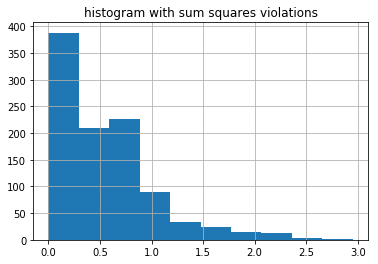

num of positive violations 781


In [415]:
ax = plt.gca()
pd.Series(np.squeeze(pref_violation.value)).hist(ax=ax,bins=10)
ax.set_title("histogram with sum squares violations")
plt.show()
print(f"num of positive violations {(v.value > 0.001).sum()}")

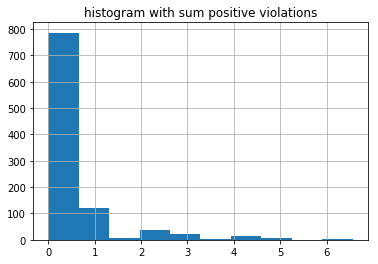

num of positive violations 235


In [417]:
ax = plt.gca()
pd.Series(np.squeeze(pref_violation.value)).hist(ax=ax, bins=10)
ax.set_title("histogram with sum positive violations")
plt.show()
print(f"num of positive violations {(v.value > 0.001).sum()}")

You may see that as expected, violations in *sum squares* are being 
dumped pretty strong after $violation>2$ in contrast to the *sum pos* 
that has larger violations. Further we see that the number of violations
in the *sum pos* case is significantly smaller.  